In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data path for train and test
#train_identity_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/train_identity.csv'
train_transaction_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/train_transaction.csv'
#test_identity_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/test_identity.csv'
#test_transaction_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/test_transaction.csv'

In [3]:
# Load data
#df_train_identity = pd.read_csv(train_identity_path)
df_train_transaction = pd.read_csv(train_transaction_path)
#df_test_identity = pd.read_csv(test_identity_path)
#df_test_transaction = pd.read_csv(test_transaction_path)

#1.0 Data Preprocessing

**1.1 Handle missing data**

In [7]:
print("Shape of train transaction :", df_train_transaction.shape)

Shape of train transaction : (590540, 394)


In [ ]:

missing_percentage = df_train_transaction.isnull().sum() / len(df_train_transaction) * 100
missing_percentage


In [29]:
# Calculate the percentage of missing values for each column
missing_percentage = df_train_transaction.isnull().sum() / len(df_train_transaction) * 100

# Set a threshold for the percentage of missing values (e.g., 15%)
threshold = 15

# Get the columns that exceed the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the columns from the DataFrame
df_train_transaction = df_train_transaction.drop(columns=columns_to_drop)

In [30]:
print("Shape of train transaction :", df_train_transaction.shape)

Shape of train transaction : (590540, 160)


In [31]:
# Visualize missing data pattern
import missingno as msno

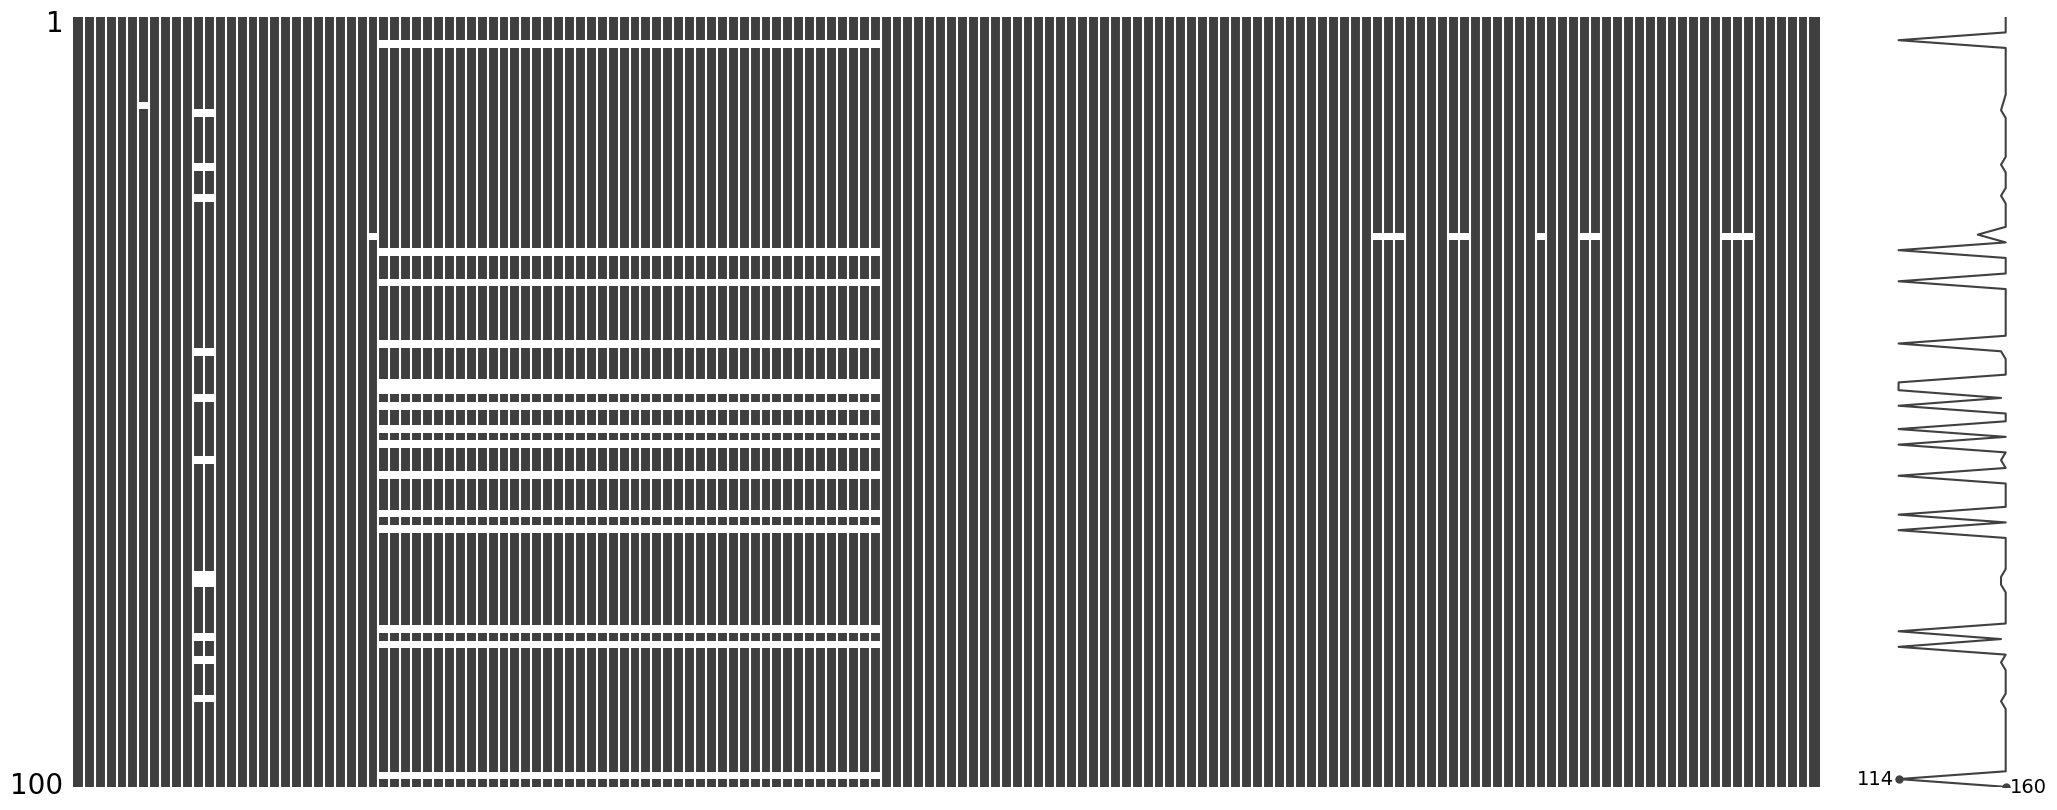

In [32]:
msno.matrix(df_train_transaction.sample(100))
plt.show()

In [38]:
# Iterate through each column in the DataFrame
for col in df_train_transaction.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_train_transaction[col]):
        # Calculate the median of the column, ignoring NaN values
        median_value = df_train_transaction[col].median()

        # Replace NaN values in the column with the median value
        df_train_transaction[col].fillna(median_value, inplace=True)


<ipython-input-38-f5f08f28ed1f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_transaction[col].fillna(median_value, inplace=True)


In [39]:
df_train_transaction.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.500,W,13926,361.0,150.0,discover,142.0,...,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,0.000000,0.000000,495.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [40]:
# Iterate through each column in the DataFrame
for col in df_train_transaction.columns:
    # Check if the column's data type is 'object' (categorical)
    if pd.api.types.is_string_dtype(df_train_transaction[col]):
        # Convert the column to categorical type
        df_train_transaction[col] = pd.Categorical(df_train_transaction[col])

        # Convert categorical values to numerical codes
        df_train_transaction[col] = df_train_transaction[col].cat.codes

In [41]:
df_train_transaction.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.500,4,13926,361.0,150.0,discover,142.0,...,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.000,4,2755,404.0,150.0,mastercard,102.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.000,4,4663,490.0,150.0,visa,166.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.000,4,18132,567.0,150.0,mastercard,117.0,...,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.000,1,4497,514.0,150.0,mastercard,102.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,2987005,0,86510,49.000,4,5937,555.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,2987006,0,86522,159.000,4,12308,360.0,150.0,visa,166.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,2987007,0,86529,422.500,4,12695,490.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,2987008,0,86535,15.000,1,2803,100.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,2987009,0,86536,117.000,4,17399,111.0,150.0,mastercard,224.0,...,0.000000,0.000000,495.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [46]:
# Find all columns with string data type
str_columns = df_train_transaction.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding on those columns
df_train_transaction = pd.get_dummies(df_train_transaction, columns=str_columns, drop_first=True)

In [48]:
print("Shape of train transaction :", df_train_transaction.shape)

Shape of train transaction : (590540, 164)


In [47]:
df_train_transaction.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,addr1,...,V318,V319,V320,V321,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit
0,2987000,0,86400,68.500,4,13926,361.0,150.0,142.0,315.0,...,0.0,0.000000,0.000000,0.000000,True,False,False,True,False,False
1,2987001,0,86401,29.000,4,2755,404.0,150.0,102.0,325.0,...,0.0,0.000000,0.000000,0.000000,False,True,False,True,False,False
2,2987002,0,86469,59.000,4,4663,490.0,150.0,166.0,330.0,...,0.0,0.000000,0.000000,0.000000,False,False,True,False,True,False
3,2987003,0,86499,50.000,4,18132,567.0,150.0,117.0,476.0,...,790.0,0.000000,0.000000,0.000000,False,True,False,False,True,False
4,2987004,0,86506,50.000,1,4497,514.0,150.0,102.0,420.0,...,0.0,0.000000,0.000000,0.000000,False,True,False,True,False,False
5,2987005,0,86510,49.000,4,5937,555.0,150.0,226.0,272.0,...,0.0,0.000000,0.000000,0.000000,False,False,True,False,True,False
6,2987006,0,86522,159.000,4,12308,360.0,150.0,166.0,126.0,...,0.0,0.000000,0.000000,0.000000,False,False,True,False,True,False
7,2987007,0,86529,422.500,4,12695,490.0,150.0,226.0,325.0,...,0.0,0.000000,0.000000,0.000000,False,False,True,False,True,False
8,2987008,0,86535,15.000,1,2803,100.0,150.0,226.0,337.0,...,0.0,0.000000,0.000000,0.000000,False,False,True,False,True,False
9,2987009,0,86536,117.000,4,17399,111.0,150.0,224.0,204.0,...,0.0,0.000000,0.000000,0.000000,False,True,False,False,True,False


In [53]:
corr_matrix = df_train_transaction.corr()

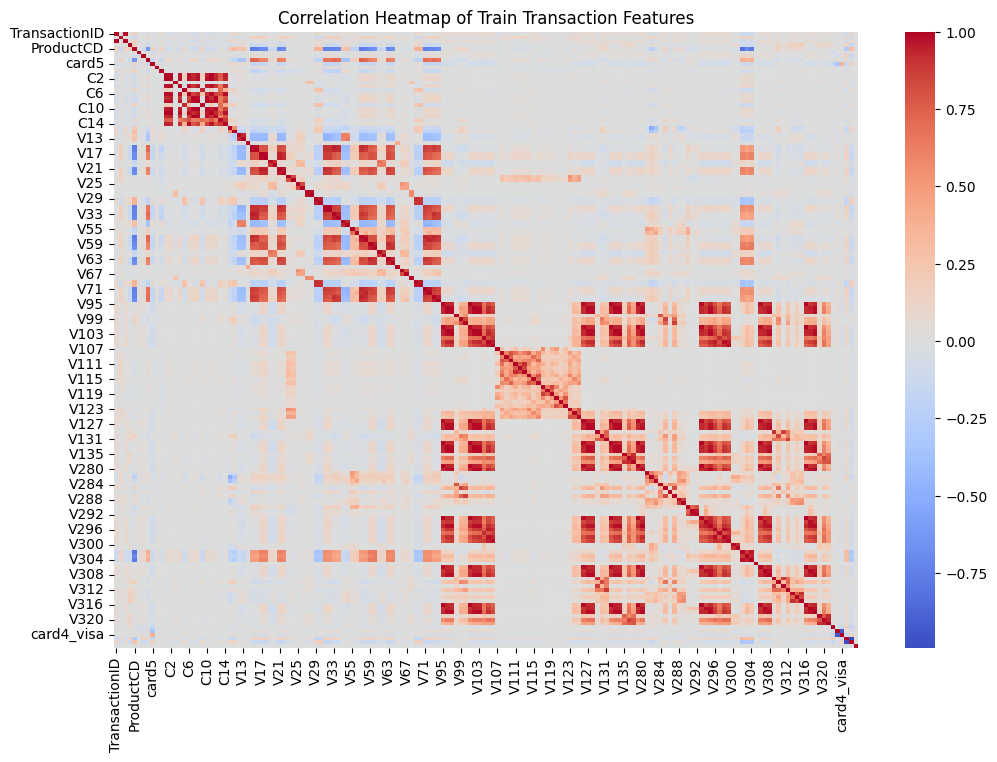

In [52]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Train Transaction Features")
plt.show()

In [60]:
# Calculate the correlation of each feature with the target variable
correlation_with_target = df_train_transaction.corr()['isFraud'].abs().sort_values(ascending=False)

# Select the top 10 features
top_10_features = correlation_with_target.index[1:11]  # Excluding the target variable itself
print(top_10_features)

Index(['PC2', 'V33', 'V17', 'V18', 'ProductCD', 'V34', 'V74', 'V15', 'card3',
       'V16'],
      dtype='object')
